# Natural Language Processing With Python's NLTK Package

Credit: https://realpython.com/nltk-nlp-python/


In [1]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.15).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Sentence & Word tokenization

In [3]:
example_string = """Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,and how many more believe learning to be difficult.
"""

## Split up the "example_string" into sentences:

In [4]:
sent_tokenize(example_string)

["Muad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,and how many more believe learning to be difficult."]

#### Tokenizing **example_string** by sentence gives you a list of three strings that are sentences:

## Tokenizing "example_string" by word:

In [5]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

## Filter Stop Words

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [8]:
word_in_quote = word_tokenize(worf_quote)
word_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

### Create a set of stop words, focus on stop words in "english":

In [9]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### empty list to hold the words that make it past the filter:

In [10]:
filtered_list = []

#### hold all the words in **words_in_quote** that aren’t stop words. 

In [11]:
for word in word_in_quote:
  if word.casefold not in stop_words:
    filtered_list.append(word)

filtered_list 

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

#### A **list comprehension** to make a list of all the words in your text that aren’t stop words:

When you use a **list comprehension**, you don’t *create an empty list and then add items to the end of it*. Instead, you define the list and its
contents at the same time. Using a **list comprehension** is often seen as 
more Pythonic.

In [12]:
filtered_list = [word for word in word_in_quote  if word.casefold not in stop_words]
filtered_list

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

# Stemming
#### Stemming is a text processing task in which you reduce words to their root, which is the core part of a word.

In [13]:
from nltk.stem import PorterStemmer

### create a **stemmer** with PorterStemmer():

In [14]:
stemmer = PorterStemmer()

In [15]:
string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

In [16]:
words = word_tokenize(string_for_stemming)
words


['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [17]:
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

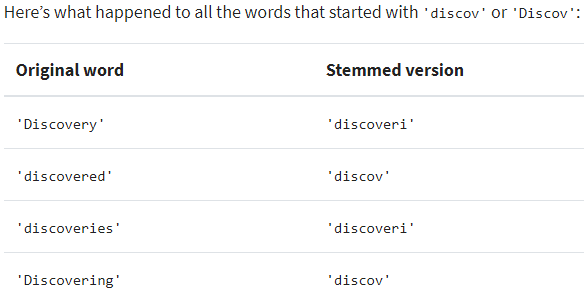
### **Understemming** and **overstemming** are two ways stemming can go wrong:

**Understemming** happens when two related words should be reduced to the same stem but aren’t. This is a **false negative**.

**Overstemming** happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a **false positive**.

## Tagging Parts of Speech
**Part of speech** is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or **POS** tagging, is the task of labeling the words in your text according to their part of speech.
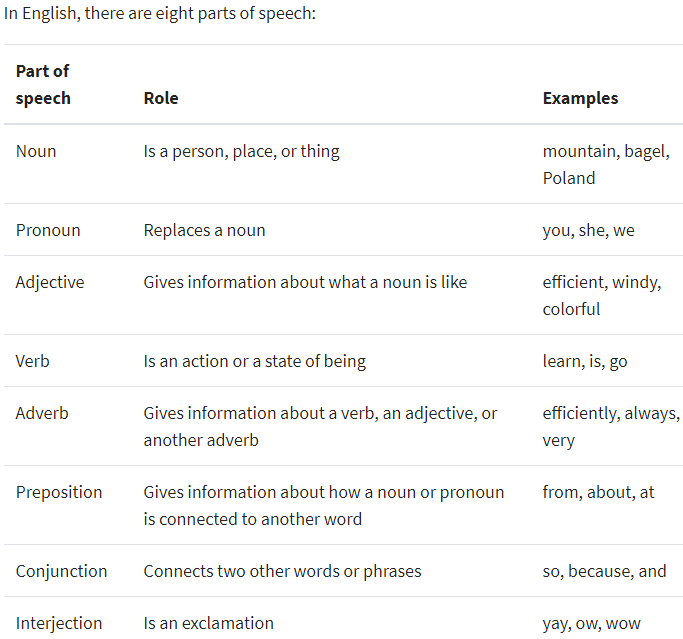

In [18]:
sagan_quote = """
... If you wish to make an apple pie from scratch,
... you must first invent the universe."""

In [19]:
words_in_sagan_quote = word_tokenize(sagan_quote)
words_in_sagan_quote

['If',
 'you',
 'wish',
 'to',
 'make',
 'an',
 'apple',
 'pie',
 'from',
 'scratch',
 ',',
 'you',
 'must',
 'first',
 'invent',
 'the',
 'universe',
 '.']

In [20]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words_in_sagan_quote)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate **tuple**, with a tag that represents their **part of speech (pos)**. But what do the tags mean? Here’s how to get a list of tags and their meanings:

In [21]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutiha

But how would **NLTK** handle tagging the parts of speech in a text that is basically gibberish? Jabberwocky is a nonsense poem that doesn’t technically mean much but is still written in a way that can convey some kind of meaning to English speakers.

Make a string to hold an excerpt from this poem:

In [22]:
jabberwocky_excerpt = """
... 'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
... all mimsy were the borogoves, and the mome raths outgrabe."""

In [23]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)
nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

## Lemmatizing
Now that you’re up to speed on parts of speech, you can circle back to **lemmatizing**. Like **stemming, lemmatizing** reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like ***'discoveri'.***
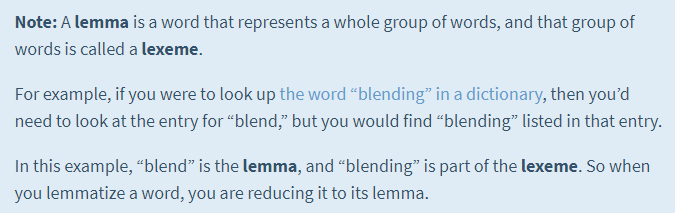

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
lemmatizer = WordNetLemmatizer()

#### Let’s start with lemmatizing a plural noun:
https://www.ef.com/wwen/english-resources/english-grammar/singular-and-plural-nouns/
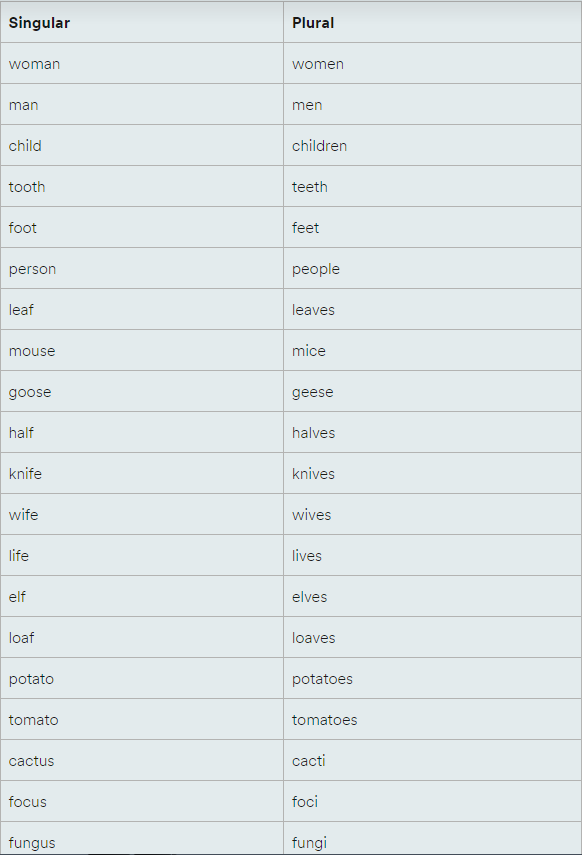

In [26]:
nltk.download('wordnet')
lemmatizer.lemmatize('women')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'woman'

In [27]:
lemmatizer.lemmatize('wives')

'wife'

In [28]:
string_for_lemmatizing = "The friends of DeSoto love scarves. Fungi, foci, cacti, tomatoes"
words = word_tokenize(string_for_lemmatizing)
words

['The',
 'friends',
 'of',
 'DeSoto',
 'love',
 'scarves',
 '.',
 'Fungi',
 ',',
 'foci',
 ',',
 'cacti',
 ',',
 'tomatoes']

### lemmatize the string, with list comprehensive

In [29]:
lemmatized = [lemmatizer.lemmatize(word) for word in words]
lemmatized

['The',
 'friend',
 'of',
 'DeSoto',
 'love',
 'scarf',
 '.',
 'Fungi',
 ',',
 'focus',
 ',',
 'cactus',
 ',',
 'tomato']

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

In [30]:
lemmatizer.lemmatize('worst')

'worst'

You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. You can make it clear that you want "worst" to be an adjective:

In [31]:
lemmatizer.lemmatize('worst', pos='a')

'bad'

The default parameter for **pos is 'n'** for noun, but you made sure that **"worst"** was treated as an **adjective** by adding the parameter **pos="a"**. As a result, you got **'bad'**, which looks very different from your original word and is nothing like what you’d get if you were stemming. This is because **"worst"** is the **superlative** form of the adjective **'bad'**, and lemmatizing reduces **superlatives** as well as comparatives to their lemmas.

##Chunking
While tokenizing allows you to identify words and sentences, **chunking** allows you to identify **phrases**.
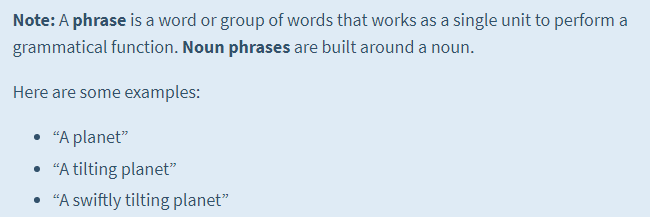

**Chunking** makes use of **POS tags** to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time.

Here’s how to import the relevant parts of NLTK in order to chunk:

In [32]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

In [33]:
words_in_lotr = word_tokenize(lotr_quote)
words_in_lotr

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

### tag the words by **part of speech (POS)**:

In [34]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
lotr_pos_tags = nltk.pos_tag(words_in_lotr)
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

## define a chunk grammar
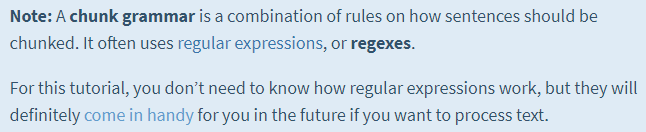

### Create a chunk grammar with one regular expression rule:

In [36]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

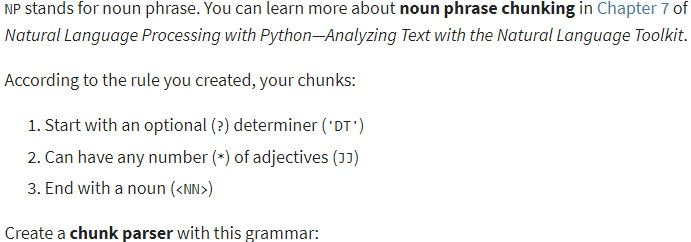

https://stackoverflow.com/questions/37604289/tkinter-tclerror-no-display-name-and-no-display-environment-variable

In [37]:
chunk_parser = nltk.RegexpParser(grammar)
chunk_parser

<chunk.RegexpParser with 1 stages>

In [ ]:
tree = chunk_parser.parse(lotr_pos_tags)
tree.draw()

## Chinking
Chinking is used together with chunking, but while **chunking** is used to include a pattern, **chinking** is used to exclude a pattern.

Let’s reuse the quote you used in the section on chunking. You already have a list of tuples containing each of the words in the quote along with its part of speech tag:

In [ ]:
lotr_pos_tags